# Time Series Forecasting with Tensorflow and Milestone Project BitPredict 💵

Let's write some tensorflow code to predict the price of Bitcoin based on the historical price of Bitcoin data.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

## Get data

In [2]:
# Download data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-21 19:32:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-21 19:32:32 (8.27 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
# Read data from csv file
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'], # Convert the 'Date' column into datetime
                 index_col=['Date'])  # Set the index column

In [4]:
# Get the first five data
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
# Get the las five data
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
# Get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
# How many samples do we have?
len(df)

2787

We have collected the historical price of Bitcoin for the past 8 years bet there's 2787 samples.

Deep learning models usually like lots of data but a smaller number of samples is something you'll often run into with time series problems.

**Note:** The seasonality of a time series dataset is referred as the number of samples per year. So, for our Bitcoin data, it has a daily seasonality because data collected per day meaning we'll get 365 samples per year.

In [8]:
# Get the only closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


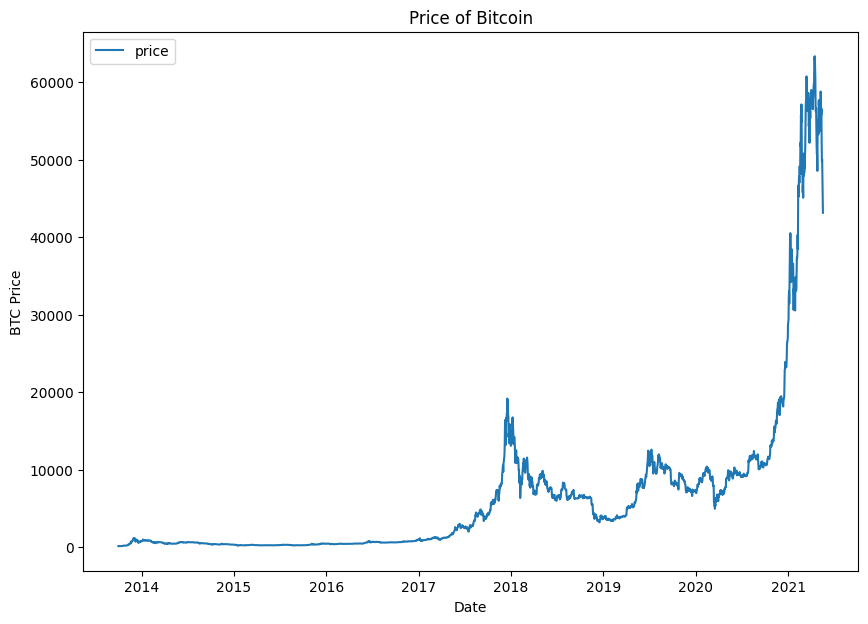

In [9]:
# Visualize the data
plt.figure(figsize=(10, 7))
plt.plot(bitcoin_prices, label='price')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price of Bitcoin')
plt.legend();

## Importing time series data with Python's CSV module

In [10]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

# Create the timestaps and btc price empty list
timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip the header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # get the date as date format
    btc_price.append(float(line[2])) # get the closing price

# View the first ten samples
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

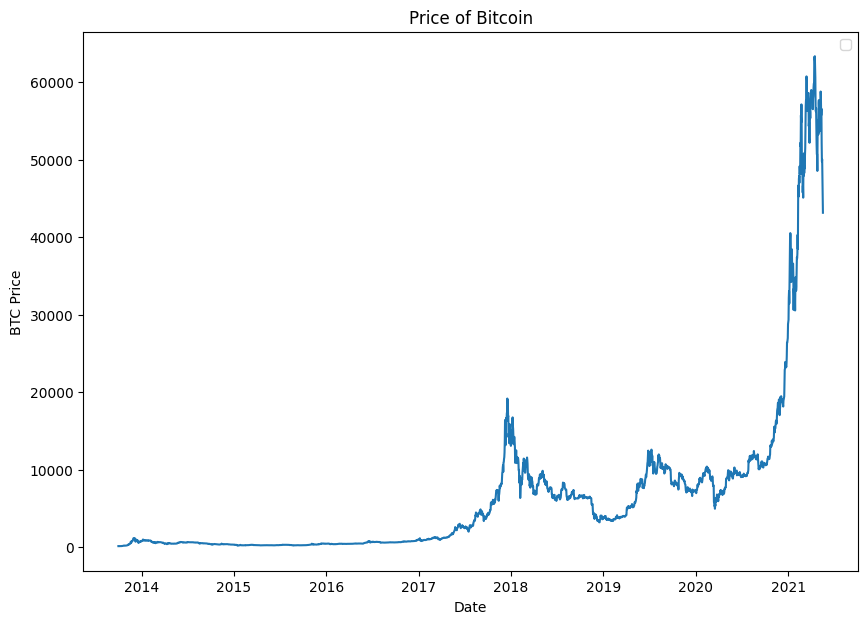

In [11]:
# Plot from CSV
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price of Bitcoin')
plt.legend();

## Create train and test sets of our time series data

### Creating train and test sets with time series data (wrong way)

In [12]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
# Wrong way to make train and test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

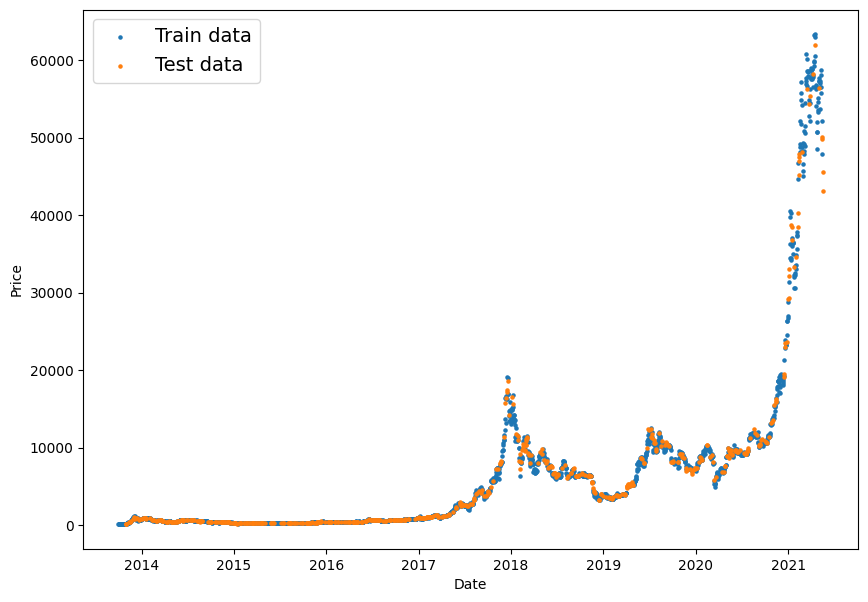

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show()

As you can see from the above plot, train and test splits have done randomly but we generally we don't want it on the time series problems because we want to predict future unseen data. Let's make this wrong split correct as below.

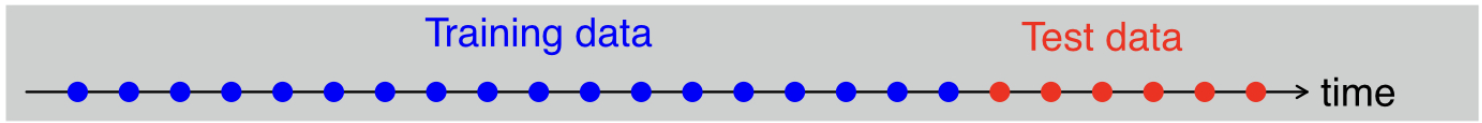

### Creating train and test sets with time series data (right way)

In [15]:
# Create train and test split the right way
split_size = int(0.8*len(prices)) # %80 train and %20 test

# Create train split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

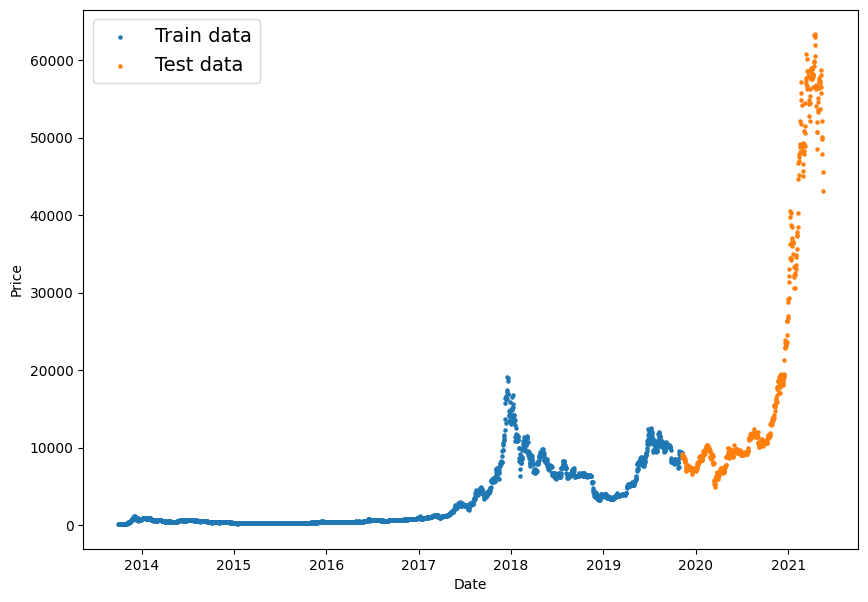

In [16]:
# Plot the split data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function


In [17]:
# Create a time series plotting function
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  '''
  Plots timesteps against values.

  Parameters:
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot, default '.'
    start: where to start the plot
    end: where to end the plot
    label: label to show on plot about values. default=None
  '''
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

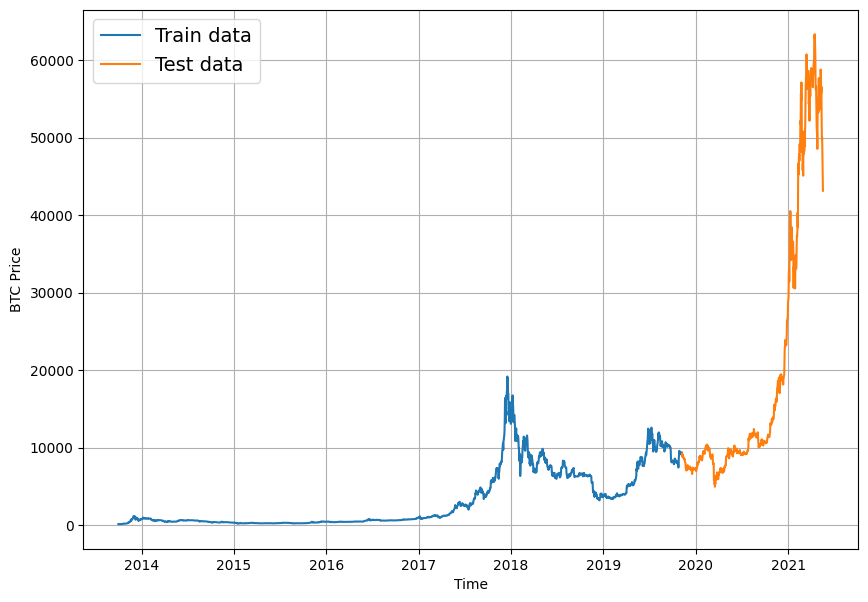

In [18]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train,
                 values=y_train,
                 start=0,
                 format='-',
                 label='Train data')

plot_time_series(timesteps=X_test,
                 values=y_test,
                 format='-',
                 label='Test data')

## Modelling Experiments

Terms to be familiar with:
 * **Horizon:** number of timesteps into the future we're going to predict
 * **Window size:** number of timesteps we're going to use to predict **horizon**

We have got Bitcoin historical data to model it. Let's run a series of modelling experiments and see which model performs best.

* 0	Naive model (baseline)
* 1	Dense model	(horizon=1, window=7)
* 2	Same as 1	(horizon=1, window=30)
* 3	Same as 1	(horizon=7, window=30)
* 4	Conv1D	(horizon=1, window=7)
* 5	LSTM	(horizon=1, window=7)
* 6	Same as 1 (but with multivariate data) (horizon=1, window=7)
* 7	N-BEATs Algorithm	(horizon=1, window=7)
* 8	Ensemble (multiple models optimized on different loss functions)	(horizon=1, window=7)
* 9	Future prediction model (model to predict future values)	(horizon=1, window=7)
* 10	Same as 1 (but with turkey data introduced)	(horizon=1, window=7)

## Model 0: Naive Forecast (Baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

This formula means that the prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1] # we want to predict last one..

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

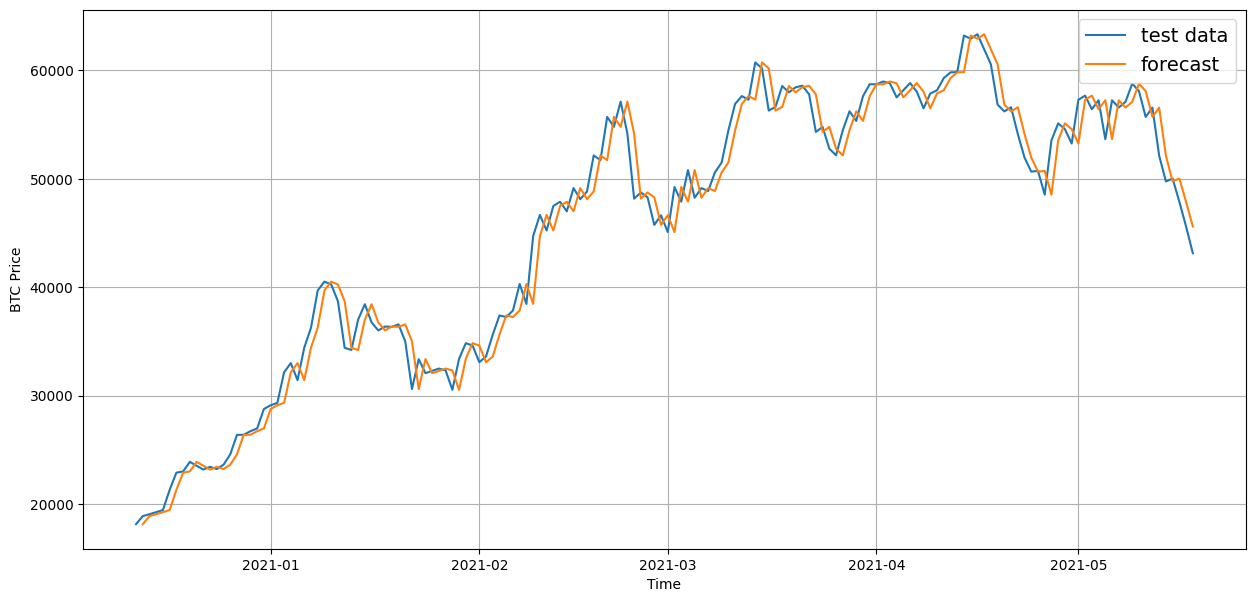

In [20]:
# Plot naive forecast
plt.figure(figsize=(15, 7))
# plot_time_series(timesteps=X_train, values=y_train, label='train data')
plot_time_series(timesteps=X_test, values=y_test, format='-', start=400, label='test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', start=400, label='forecast')

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

We're predicting a number, so thats means we have a form of regression problem. We will need some regression-like metrics because we are working on regression problem.

A few common regression metrics which can also be used for time series forecasting:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MASE - mean absolute scaled error (only for time series)
* sMAPE - symmetric mean absolute percentage error (only for time series)

For all of the above metrics, **lower is better.**

Note: If MASE is greater than 1, it means that forecast is worse than the naive but if MASE is lower than, it means forecast is better than the naive.

Find out more about MASE and sMAPE in here: https://otexts.com/fpp3/accuracy.html

The main thing we're evaluating here is: how to our model's forecast compare against the actual values?

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  '''
  Implement MASE (assuming no seasonality of data)
  '''
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [22]:
# Get the mean absolute scaled error
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

We are so close to 1 because we already evaluate the naive model results.

In [23]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [24]:
# Get the naive results
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Datra Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

`Windowing for one week:`

`[0, 1, 2, 3, 4, 5, 6] -> [7]`

`[1, 2, 3, 4, 5, 6, 7] -> [8]`

`[2, 3, 4, 5, 6, 7, 8] -> [9]`

In [25]:
print(f"We are using this 7 data: {btc_price[:7]},\nTo predict this: {btc_price[7]}")

We are using this 7 data: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
To predict this: 123.033


In [26]:
# Setup the global variable for horizon and window size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week for the predicting next day

In [27]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  '''
  Creates labels for windowed dataset.

  E.g if horizon=1

  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  '''
  return x[:, :-horizon], x[:, -horizon:]

In [28]:
# Create an array for testing the window labelling function
test_array = tf.expand_dims(tf.range(8), axis=0)
test_array

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [29]:
# Test the window labelling function with test array
test_window, test_label = get_labelled_windows(test_array)
print(f"Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have got a way to label our windowed data.

However, this only works on a small scale. We need a way to do the avove across out entire time series.

We could do this with python for loop but for large time series, that would be quite slow. To speed things up, we will leverage Numpy's array indexing.

Our function steps:

1. Create a window step of specific window size
2. Use numpy indexing to create a 2d arrat of multiple window steps
3. Uses the 2d array of multiple window steps to index on a target series
4. Uses our `get_labelled_windows()` function we created above to turn window steps into windows with a specified horizon

In [30]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  '''
  Turns 1D array into 2D array of sequential labelled windows of window_size with horizon size label
  '''

  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D arrat of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array (a time series) with 2D array of mulitple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled window
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [31]:
# Create the all windows and labels
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
# View the first 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}\n")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]

Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]

Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]



Now, our problem is turned into supervised learning because we have labelled data.


In [33]:
# View the last 3 windows and labels
for i in range(1, 4):
  print(f"Window: {full_windows[-i]} -> Label: {full_labels[-i]}\n")

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]

Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]



That's look pretty cool. We created a function that called `make_windows()` and windowed our data but we can do same thing using tensorflow and we dont need to create a function. Find out more: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into train and test sets

In [34]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  '''
  Splits windows and labels into train and test splits.
  '''
  splits_size = int(len(windows) * (1-test_split)) # %80 train / %20 test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [35]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [36]:
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we used 32)
* 100 epochs

This values just coming from experimentation.

In [37]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation same as no activation
], name='model_1_dense')

# 2. Compile the model
model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1120.0571 - mae: 1120.0571 - mse: 4330540.5000   
Epoch 1: val_loss improved from inf to 1823.60718, saving model to model_experiments/model_1_dense
18/18 [==============================] - 6s 55ms/step - loss: 1120.0571 - mae: 1120.0571 - mse: 4330540.5000 - val_loss: 1823.6072 - val_mae: 1823.6072 - val_mse: 8094116.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 312.9977 - mae: 312.9977 - mse: 307176.8125
Epoch 2: val_loss improved from 1823.60718 to 1378.69031, saving model to model_experiments/model_1_dense
18/18 [==============================] - 0s 26ms/step - loss: 265.0132 - mae: 265.0132 - mse: 270868.5938 - val_loss: 1378.6903 - val_mae: 1378.6903 - val_mse: 4517906.0000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 172.4275 - mae: 172.4275 - mse: 152735.7500
Epoch 3: val_loss improved from 1378.69031 to 1004.92639, saving model to model_experiments/model_1_d

In [38]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 642.1810 - mae: 642.1810 - mse: 1329759.7500


[642.1810302734375, 642.1810302734375, 1329759.75]

This scores are the last epoch's score but what about the best performing epoch? Let's load it and evaluate the model performance.

In [39]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.0485 - mae: 570.0485 - mse: 1174639.0000


[570.0484619140625, 570.0484619140625, 1174639.0]

## Making forecast with a model (on the test dataset)

To make forecast on the test data (actually, it is not forecast, they are only psuedo forecasts because actual forecast are into the future), let's wirte a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Return the predictions

In [40]:
# Create a function that makes predictions
def make_preds(model, input_data):
  '''
  Uses model to make predicitons input_data
  '''
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [41]:
# Make predictions using model_1 on the test data and view results
model_1_preds = make_preds(model=model_1,
                           input_data=test_windows)

print(f"Number of predicitions: {len(model_1_preds)}\n")
print(f"First 10 prediction: {model_1_preds[:10]}")

18/18 [==============================] - 0s 1ms/step
Number of predicitions: 551

First 10 prediction: [8742.136  8657.371  8537.012  8447.165  8521.104  8256.305  8109.6885
 8067.2085 7678.301  7289.1245]


In [42]:
# Evaluate the model_1 predictions
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # there is extra dimension so we squeeze it
                                 y_pred=model_1_preds)

model_1_results

{'mae': 570.04846,
 'mse': 1174639.0,
 'rmse': 1083.8076,
 'mape': 2.5376163,
 'mase': 0.99493396}

In [43]:
# Remind the naive model's results
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

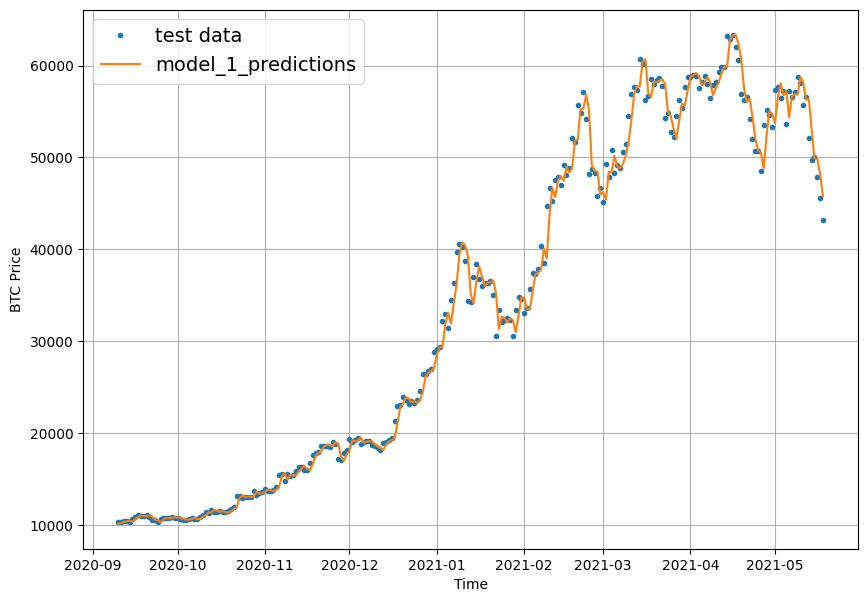

In [44]:
# Let's plot out model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_predictions')

## Model 2: Dense model (window=30, Horizon=1)

In [45]:
HORIZON = 1 # predict one step
WINDOW_SIZE = 30 # use past 30 samples for prediction

In [46]:
# Make windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [47]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [48]:
# Check the first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [49]:
# Check the first 3 train labels
train_labels[:3]

array([[196.02499],
       [198.04883],
       [198.93233]])

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation equals to no activation
], name='model_2_dense')

# Compile the model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit the model 2
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 3036.49585, saving model to model_experiments/model_2_dense

Epoch 2: val_loss improved from 3036.49585 to 2296.50269, saving model to model_experiments/model_2_dense

Epoch 3: val_loss improved from 2296.50269 to 2007.20361, saving model to model_experiments/model_2_dense

Epoch 4: val_loss improved from 2007.20361 to 1692.63672, saving model to model_experiments/model_2_dense

Epoch 5: val_loss improved from 1692.63672 to 1254.12793, saving model to model_experiments/model_2_dense

Epoch 6: val_loss did not improve from 1254.12793

Epoch 7: val_loss improved from 1254.12793 to 1168.13159, saving model to model_experiments/model_2_dense

Epoch 8: val_loss improved from 1168.13159 to 1144.11182, saving model to model_experiments/model_2_dense

Epoch 9: val_loss did not improve from 1144.11182

Epoch 10: val_loss improved from 1144.11182 to 1068.98804, saving model to model_experiments/model_2_dense

Epoch 11: val_loss did not improve from 1068.98

In [67]:
# Evaluate the model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 682.3146 - mae: 682.3146 - mse: 1457387.6250


[682.3146362304688, 682.3146362304688, 1457387.625]

In [68]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 623.2429 - mae: 623.2429 - mse: 1317413.7500


[623.242919921875, 623.242919921875, 1317413.75]

In [69]:
# Get forecast predictions
model_2_preds = make_preds(model=model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [70]:
# Evaluate the results of model 2
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 623.24304,
 'mse': 1317413.8,
 'rmse': 1147.7864,
 'mape': 2.7542775,
 'mase': 1.0548869}

In [73]:
# Remind the model 1 results
model_1_results

{'mae': 570.04846,
 'mse': 1174639.0,
 'rmse': 1083.8076,
 'mape': 2.5376163,
 'mase': 0.99493396}

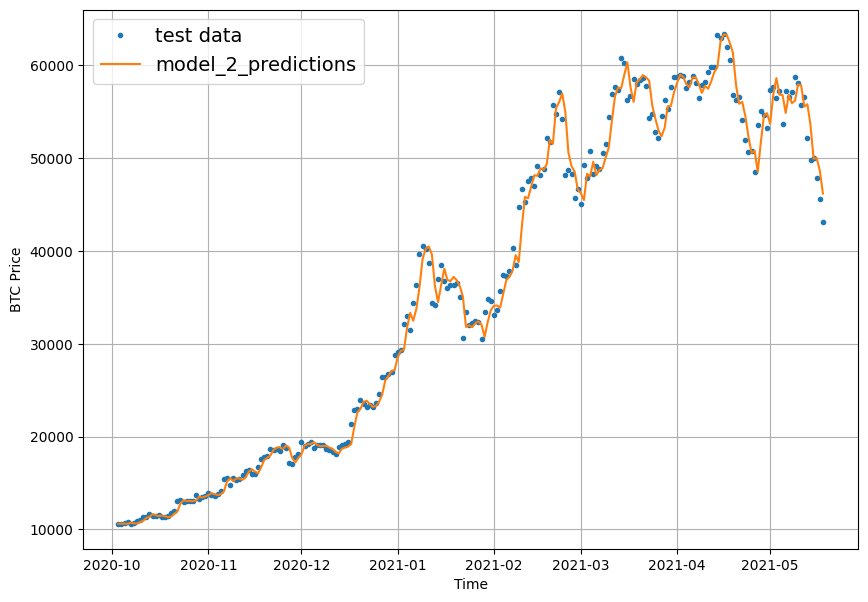

In [75]:
# Let's plot out model 2 predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label='model_2_predictions')